Question 3


In [1]:
import numpy as np

### Load and normalize our data

In [2]:
from tensorflow.keras.datasets import mnist


# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


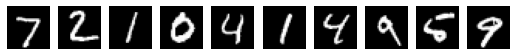

In [3]:
from matplotlib import pyplot as plt

n = 10
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(test_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')

plt.show()

In [4]:
from tensorflow import keras

pretrained_model = keras.models.load_model('initially_trained_autoencoder.h5')

313/313 [==============================] - 2s 6ms/step


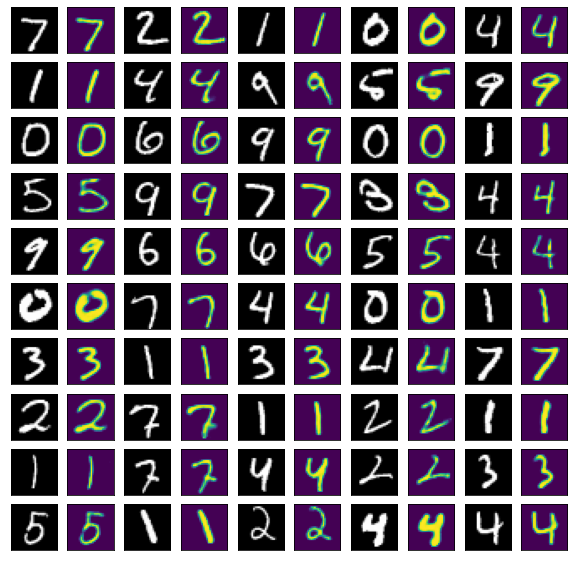

In [5]:
reconstructed_images = pretrained_model.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

In [6]:
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image

# loading image
S1 = tf.keras.utils.load_img("C:/Users/saisi/Desktop/DSP/W11/i1.png", target_size=(28, 28), color_mode = "grayscale")

S2 = tf.keras.utils.load_img("C:/Users/saisi/Desktop/DSP/W11/i2.png", target_size=(28, 28), color_mode = "grayscale")

S3 = tf.keras.utils.load_img("C:/Users/saisi/Desktop/DSP/W11/i3.png", target_size=(28, 28), color_mode = "grayscale")

S4 = tf.keras.utils.load_img("C:/Users/saisi/Desktop/DSP/W11/i4.png", target_size=(28, 28), color_mode = "grayscale")

S5 = tf.keras.utils.load_img("C:/Users/saisi/Desktop/DSP/W11/i5.png", target_size=(28, 28), color_mode = "grayscale")

In [7]:
new_images = np.vstack([S1,S2,S3,S4,S5,])
test_s = new_images.reshape(-1, 784)
train_s = new_images.reshape(-1, 784)
train_s = train_s.astype('float32') /255
test_s = test_s.astype('float32') /255

oversampling

In [8]:
train_s = np.repeat(train_s[:],25,axis=0)

In [9]:
train_s.shape

(125, 784)

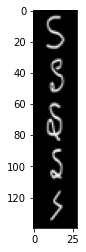

In [10]:
plt.imshow(new_images, cmap="gray")
ax.axis('off')

plt.show()

In [11]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

input_dim = 28*28
latent_vec_len = 784 # this is the 'bottleneck' of the autoencoder

# Define the autoencoder architecture
# build the encoder
autoencoder = Sequential()
autoencoder.add(Input(shape=(input_dim,)))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(100, activation='relu'))

# the bottleneck layer
autoencoder.add(Dense(latent_vec_len, activation='relu'))

# the decoder layer
autoencoder.add(Dense(100, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))

# Compile the autoencoder model
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

# Get summary
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               392500    
                                                                 
 dense_1 (Dense)             (None, 300)               150300    
                                                                 
 dense_2 (Dense)             (None, 100)               30100     
                                                                 
 dense_3 (Dense)             (None, 784)               79184     
                                                                 
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 dense_5 (Dense)             (None, 300)               30300     
                                                                 
 dense_6 (Dense)             (None, 500)               1

In [12]:
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
new_image_set = train_images[:30000]
for i in range(len(train_s)):
    input_arr = train_s[i]
    input_arr = input_arr.reshape(784)
    np.random.shuffle(train_s)
    bad_images = np.repeat(input_arr.reshape(-1, 1, 28, 28), 135, axis=1).reshape(-1, 784)
    new_image_set = np.concatenate((new_image_set, bad_images))
    np.random.shuffle(new_image_set)




new_images_train = new_image_set[int(len(new_image_set)*.8):]

new_images_test = new_image_set[int(len(new_image_set)*.2):]
   

In [27]:
   # Train the autoencoder with MNIST data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = autoencoder.fit(
        x=train_images, # For autoencoders, both the input and the target are the same
        y=train_images, 
        epochs=10, 
        batch_size=128,
        shuffle=True, 
        validation_data=(new_images_test, new_images_test),
        callbacks=[early_stop]
    )

Epoch 1/10
469/469 [==============================] - 15s 32ms/step - loss: 0.0715 - val_loss: 0.0952
Epoch 2/10
469/469 [==============================] - 15s 32ms/step - loss: 0.0715 - val_loss: 0.0959
Epoch 3/10
469/469 [==============================] - 15s 32ms/step - loss: 0.0714 - val_loss: 0.0956
Epoch 4/10
469/469 [==============================] - 15s 33ms/step - loss: 0.0714 - val_loss: 0.0952
Epoch 5/10
469/469 [==============================] - 15s 33ms/step - loss: 0.0712 - val_loss: 0.0947
Epoch 6/10
469/469 [==============================] - 16s 33ms/step - loss: 0.0711 - val_loss: 0.0956
Epoch 7/10
469/469 [==============================] - 15s 33ms/step - loss: 0.0711 - val_loss: 0.0957
Epoch 8/10
469/469 [==============================] - 15s 33ms/step - loss: 0.0711 - val_loss: 0.0974
Epoch 9/10
469/469 [==============================] - 16s 34ms/step - loss: 0.0709 - val_loss: 0.0957
Epoch 10/10
469/469 [==============================] - 18s 39ms/step - loss: 0.070

313/313 [==============================] - 2s 6ms/step


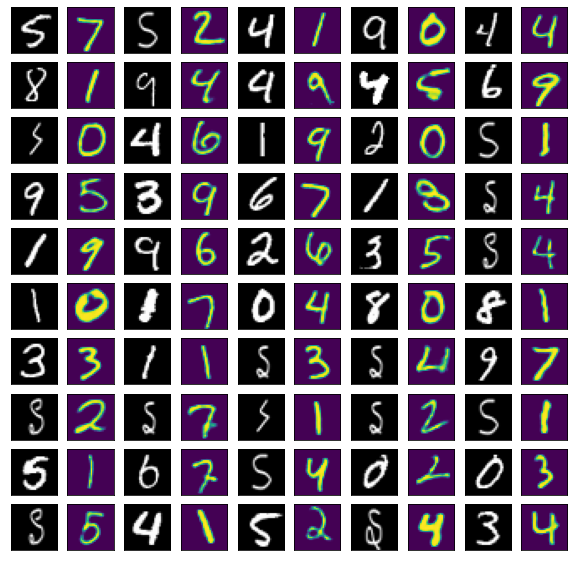

In [28]:
 reconstructed_images = autoencoder.predict(test_images)

images = []
for i in range(100):
    images.append(new_images_test[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

In [29]:
autoencoder.save('initially_trained_autoencoder.h5')

By executing the autoencoder, with combining the mnist dataset and the first letter of my name, I found that there are very few images are matching. By training with more images there might be an increase in possibility of matching the images.